In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm

### Exercise 1

In [4]:
def model(t,z0):
    x,y,z = z0
    dxdt =  x + 4*z
    dydt = 2*y
    dzdt =  3*x + y -  3*z
    return np.array([dxdt,dydt,dzdt])

In [5]:
fx  =  lambda t: 4 * np.exp(2 * t) + 2* np.exp(3*t) + 2* np.exp(-5 *t)
fy =  lambda t: -7 * np.exp(2*t)
fz  =  lambda t: np.exp(2*t)  + np.exp(3*t) -  3*np.exp(-5*t)


In [13]:
def ModifiedEuler(t,c,h,f):
    m = len(c)
    z  =  np.zeros((len(t),m))
    z[0] = c
    
    for n in range(0,len(t)-1):
        k1 =  h * f(t[n], z[n])
        k2 =  h * f(t[n] + h, z[n] + k1)
        z[n+1] = z[n]  + (1/2) * (k1 + k2)
    return z
    

In [16]:
t =  np.linspace(0,1,100)
h =  t[1] -  t[0]
c =  np.array([8,-7,-1])
z =  ModifiedEuler(t,c,h,model)
actual_x  =  fx(t)
actual_y  =  fy(t)
actual_z  =  fz(t)

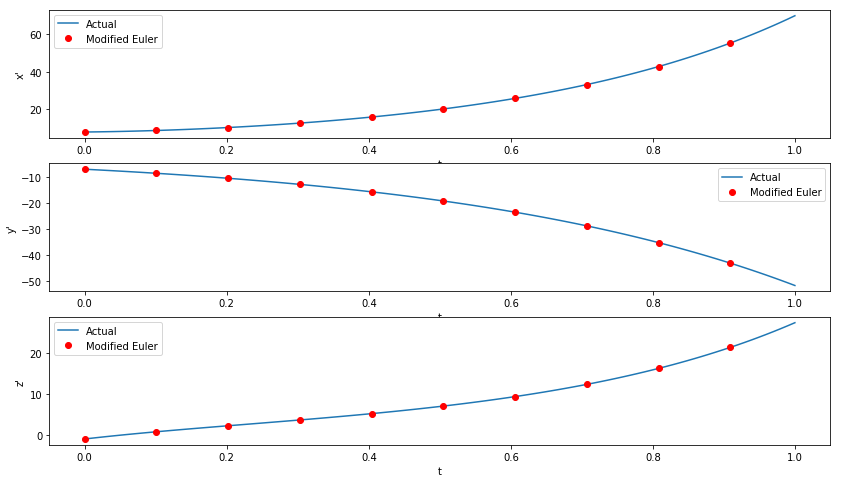

In [31]:
plt.figure(figsize=(14,8))
plt.subplot(3,1,1)
plt.plot(t,actual_x)
plt.plot(t[::10],z[:,0][::10],"ro")
plt.xlabel("t")
plt.ylabel("x'")
plt.legend(["Actual","Modified Euler"])

plt.subplot(3,1,2)
plt.plot(t,actual_y)
plt.plot(t[::10],z[:,1][::10],"ro")
plt.xlabel("t")
plt.ylabel("y'")
plt.legend(["Actual","Modified Euler"])


plt.subplot(3,1,3)
plt.plot(t,actual_z)
plt.plot(t[::10],z[:,2][::10],"ro")
plt.xlabel("t")
plt.ylabel("z'")
plt.legend(["Actual","Modified Euler"])
plt.show()

### Exercise 2

In [32]:
A =  np.array([[1,0,4],[0,2,0],[3,1,-3]])
def finiteDifferencing(A,h,c):
    w  =  np.zeros((len(t),len(c)))
    w[0] = c
    for n in range(0,len(t)-1):
        w[n+1] = expm(h * A) @ w[n]
    return w

In [33]:
w = finiteDifferencing(A,h,c)

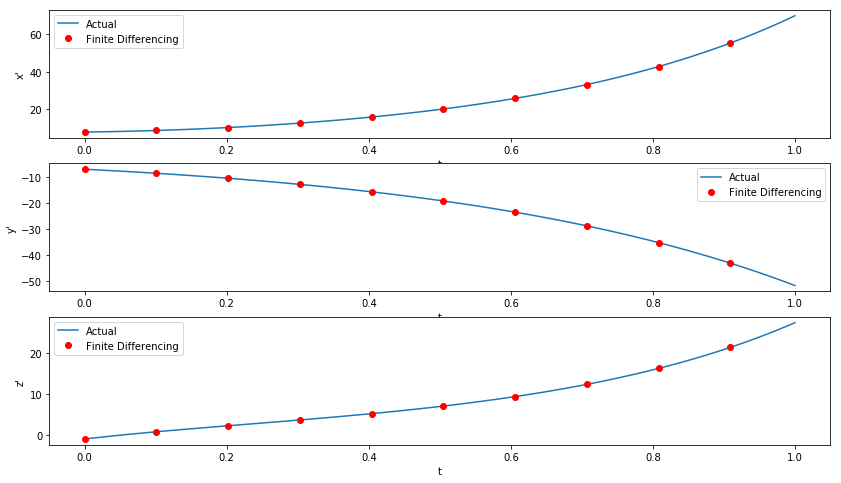

In [37]:
plt.figure(figsize=(14,8))
plt.subplot(3,1,1)
plt.plot(t,actual_x)
plt.plot(t[::10],w[:,0][::10],"ro")
plt.xlabel("t")
plt.ylabel("x'")
plt.legend(["Actual","Finite Differencing"])

plt.subplot(3,1,2)
plt.plot(t,actual_y)
plt.plot(t[::10],w[:,1][::10],"ro")
plt.xlabel("t")
plt.ylabel("y'")
plt.legend(["Actual","Finite Differencing"])


plt.subplot(3,1,3)
plt.plot(t,actual_z)
plt.plot(t[::10],w[:,2][::10],"ro")
plt.xlabel("t")
plt.ylabel("z'")
plt.legend(["Actual","Finite Differencing"])
plt.show()

### Exercise 3

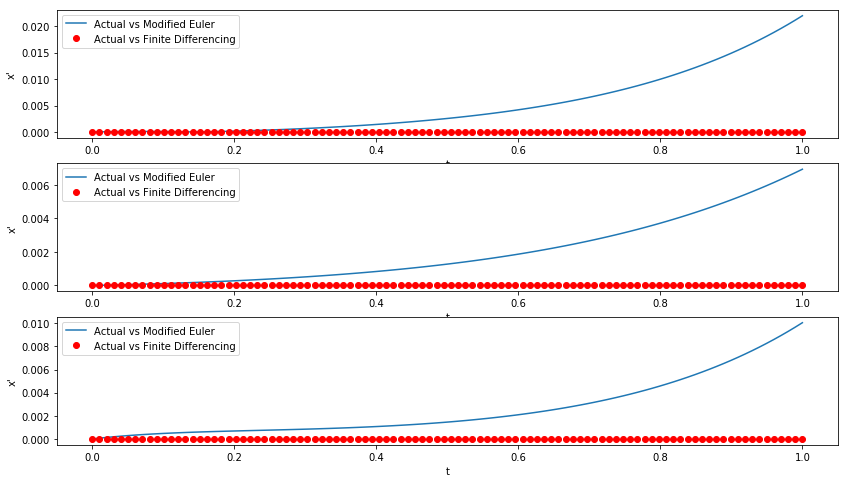

In [42]:
plt.figure(figsize=(14,8))
plt.subplot(3,1,1)
plt.plot(t,abs(actual_x - z[:,0]))
plt.plot(t,abs(actual_x - w[:,0]),"ro")
plt.xlabel("t")
plt.ylabel("x'")
plt.legend(["Actual vs Modified Euler","Actual vs Finite Differencing"])

plt.subplot(3,1,2)
plt.plot(t,abs(actual_y - z[:,1]))
plt.plot(t,abs(actual_y - w[:,1]),"ro")
plt.xlabel("t")
plt.ylabel("x'")
plt.legend(["Actual vs Modified Euler","Actual vs Finite Differencing"])


plt.subplot(3,1,3)
plt.plot(t,abs(actual_z - z[:,2]))
plt.plot(t,abs(actual_z - w[:,2]),"ro")
plt.xlabel("t")
plt.ylabel("x'")
plt.legend(["Actual vs Modified Euler","Actual vs Finite Differencing"])

plt.show()

#### From the above error graphs, which show a nearly constant error for finite differencing method; therefore, the latter is more accurate than the former at approximating  numerical solutions to systems of ODEs.